<a href="https://www.kaggle.com/code/shwetakolekar/predict-water-quality?scriptVersionId=155165433" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 Student Name: **SHWETA KOLEKAR**
 

# Project Title: WATER QUALITY PREDICTION

# 1. Bussiness understanding

* The Quality of water is major concern for us.Safe water is important for everyone whether it is used for drinking ,food production or domestic use.The contaminated water facilitate the transmission of diseases such as  cholera,diarrhea,dysentery,typhoid
   
* The Quality of water is a major concern for people .By using the algorithms we have to determine the water Quality .   



**About Dataset**


*  Potable water is water that is safe for ingestion, either when drunk directly in liquid form or consumed indirectly through food preparation.

**1.pH value**-The pH of most drinking-water lies within the range 6.5–8.5. 

**2.Hardness**-Hardness is due to the presence of multiple  metal ions which come from minerals dissolved in the water. Freshwater has hardness in the range of 15 to 375 ppm.

**3.Solids**- Dissolved solids refer to any minerals ,salts,metals in water.Total dissolved solids comprise inorganic salts,calcium,magnesium,potassium etc.Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose

**4.Sulfate**-Sulfate levels above 250 mg/L may make the water taste bitter or like medicine.People are not used to drink water with high sulfate it causes diarrhea and dehydration.

**5 Chloramines**- Chloramine are the major disinfectants used in  water. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water.Chlorine level up to 4 milligrams per liter are considered safe for drinking water.

**6.Conductivity**-Pure water is not good conductor of electric current. This ability directly depends on the concentration of conductive ions in the water.

**7.Organic_carbon**-TOC(Total organic carbon)is a measure of the total amount of carbon in organic compounds in pure water.Level of TOC are 0.05 ml/l or less.

**8.Trihalomethanes**-Trihalomethane levels upto 80 ppm is considered safe in drinking water.

**9.Turbidity**-Turbidity is a measurement of solid matter being suspended in water.
The WHO  establishes that the turbidity of drinking water shouldn't be more than 5 NTU, and should ideally be below 1 NTU.

**10.Potability**-It indicates if water is safe for drinking or not.1 means its potable and 0 means not potable.

# 2.Data Understanding

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

* I imported the different libraries which are used in this model.

In [96]:
data=pd.read_csv("/kaggle/input/water-potability/water_potability.csv")

* I uploaded the water Quality dataset from kaggle.

In [97]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [98]:
data.shape

(3276, 10)

* In this dataset 10 columns are their and 3276 rows are present

In [99]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


* From this 5 rows we have to get  idea about dataset what type of data is present in dataset and whcih type of features are presnt in it.

In [100]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


* From this we find out all the values in dataset are in float.SO these are numeric values.

In [102]:
print('Covariance:')
display(data.cov(numeric_only=True))


print('\nCorrelation:')
display(data.corr(numeric_only=True))

Covariance:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,2.541855,4.311552,-1.241574e+03,-0.087082,1.186266,2.402716,0.229169,0.085900,-0.048879,-0.002773
Hardness,4.311552,1081.078715,-1.352149e+04,-1.564367,-144.761334,-63.552473,0.392670,-6.922214,-0.370747,-0.221943
Solids,-1241.574314,-13521.486526,7.688783e+07,-973.746052,-62357.772446,9802.117116,297.108377,-1291.069341,133.751106,144.345121
Chloramines,-0.087082,-1.564367,-9.737461e+02,2.506158,1.787528,-2.621264,-0.066268,0.436685,0.002920,0.018365
Sulfate,1.186266,-144.761334,-6.235777e+04,1.787528,1715.354674,-53.930463,4.224945,-20.163481,-0.362612,-0.477408
Conductivity,2.402716,-63.552473,9.802117e+03,-2.621264,-53.930463,6532.529330,5.605967,1.682967,0.365712,-0.320499
Organic_carbon,0.229169,0.392670,2.971084e+02,-0.066268,4.224945,5.605967,10.943936,-0.712170,-0.070499,-0.048419
Trihalomethanes,0.085900,-6.922214,-1.291069e+03,0.436685,-20.163481,1.682967,-0.712170,261.630897,-0.278380,0.056334
Turbidity,-0.048879,-0.370747,1.337511e+02,0.002920,-0.362612,0.365712,-0.070499,-0.278380,0.608997,0.000602
Potability,-0.002773,-0.221943,1.443451e+02,0.018365,-0.477408,-0.320499,-0.048419,0.056334,0.000602,0.237997



Correlation:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


* Covariance indicates the direction of the linear relationship between variables. Correlation measures both the strength and direction of the linear relationship between two variables. 
*  In covariance the Solids relationship with Potability is 144.34 and other features realationship is negtive or less than 1.
*  In correlation again the solids relationship with Potability is 0.033 which is  higher than other.
* So Solids is good relationship  with target variable.
 

# 3.Data Cleaning

In [103]:
# 5. Check missing data
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

* Here we find out in ph,Sulfate,trihalomethanes have null values.

In [104]:
percent_missing=data.isnull().sum()*100/len(data)
print(percent_missing)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


* I checked precentage for null values and i found out Sulfate has 23% null value. So I dropped that column. 

In [105]:
data=data.drop(["Sulfate"],axis=1)

In [106]:
data.head()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0


In [107]:
data=data.fillna(data.median(numeric_only=True))

* My dataset is numerical so i filled  null value with median. 

In [108]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [109]:
data.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

* Potability is so unbalanced.We see that from this value count.

# 4.Data Visualization

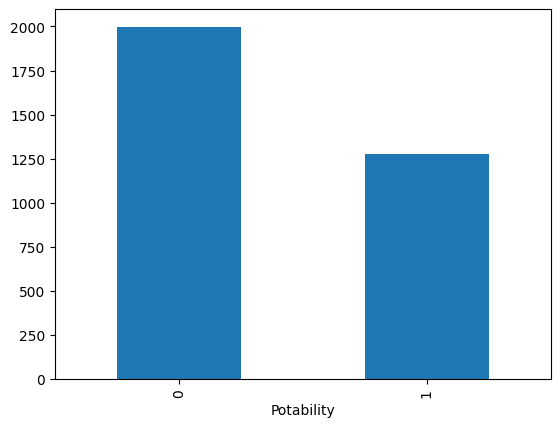

In [110]:
data['Potability'].value_counts().plot(kind='bar')
plt.show()

<Axes: >

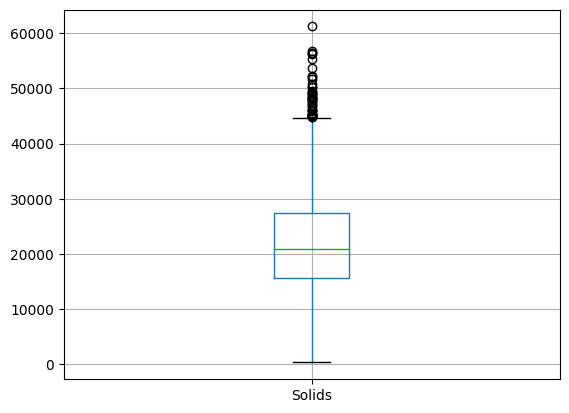

In [111]:
data.boxplot(column=['Solids'])

<Axes: >

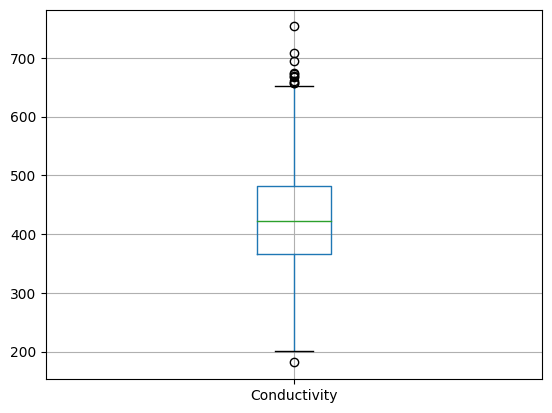

In [112]:
data.boxplot(column=['Conductivity'])

<Axes: >

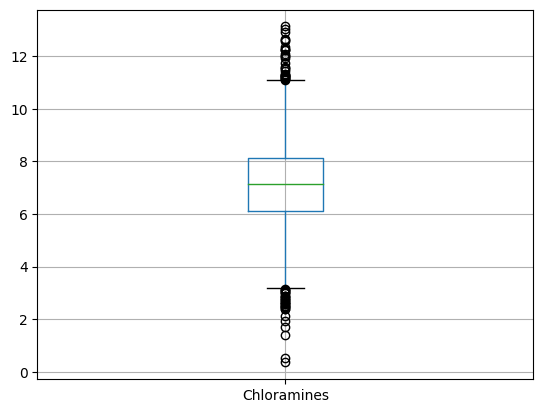

In [113]:
data.boxplot(column=['Chloramines'])

<Axes: >

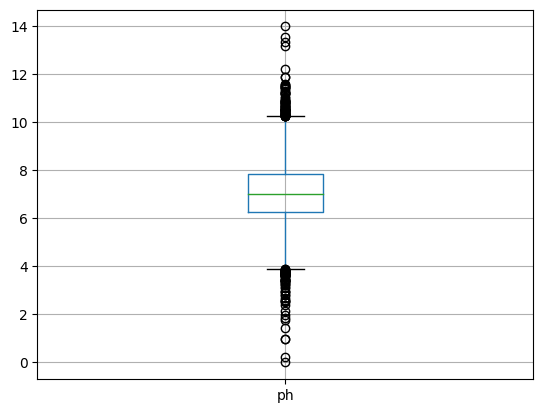

In [114]:
data.boxplot(column=['ph'])

<Axes: >

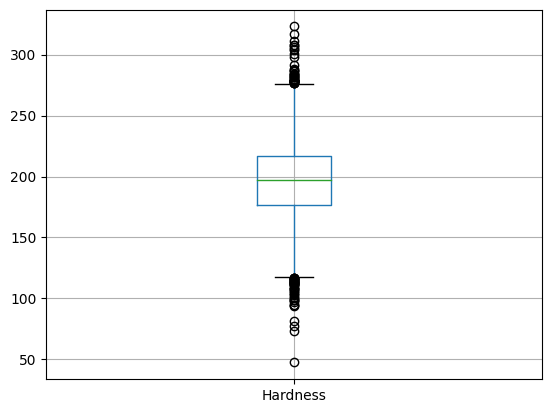

In [115]:
data.boxplot(column=['Hardness'])

* From boxplot we find out some outliers are their in 'ph','Chloramine,'conductivity','solids','Hardness'

<Axes: xlabel='Hardness', ylabel='Count'>

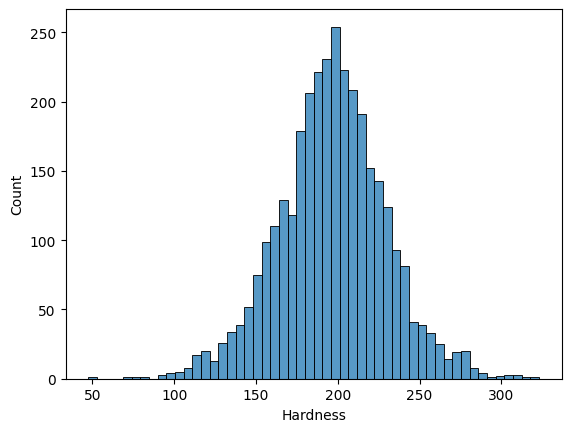

In [116]:
sns.histplot(data, x="Hardness")

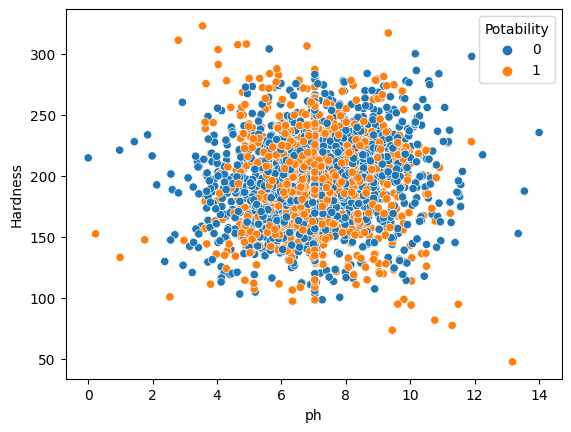

In [117]:
# Scatter plots: 
#sns.scatterplot(x=data['ph'],y=data['Sulfate'],hue="Potability")
sns.scatterplot(data,x="ph",y="Hardness",hue="Potability")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


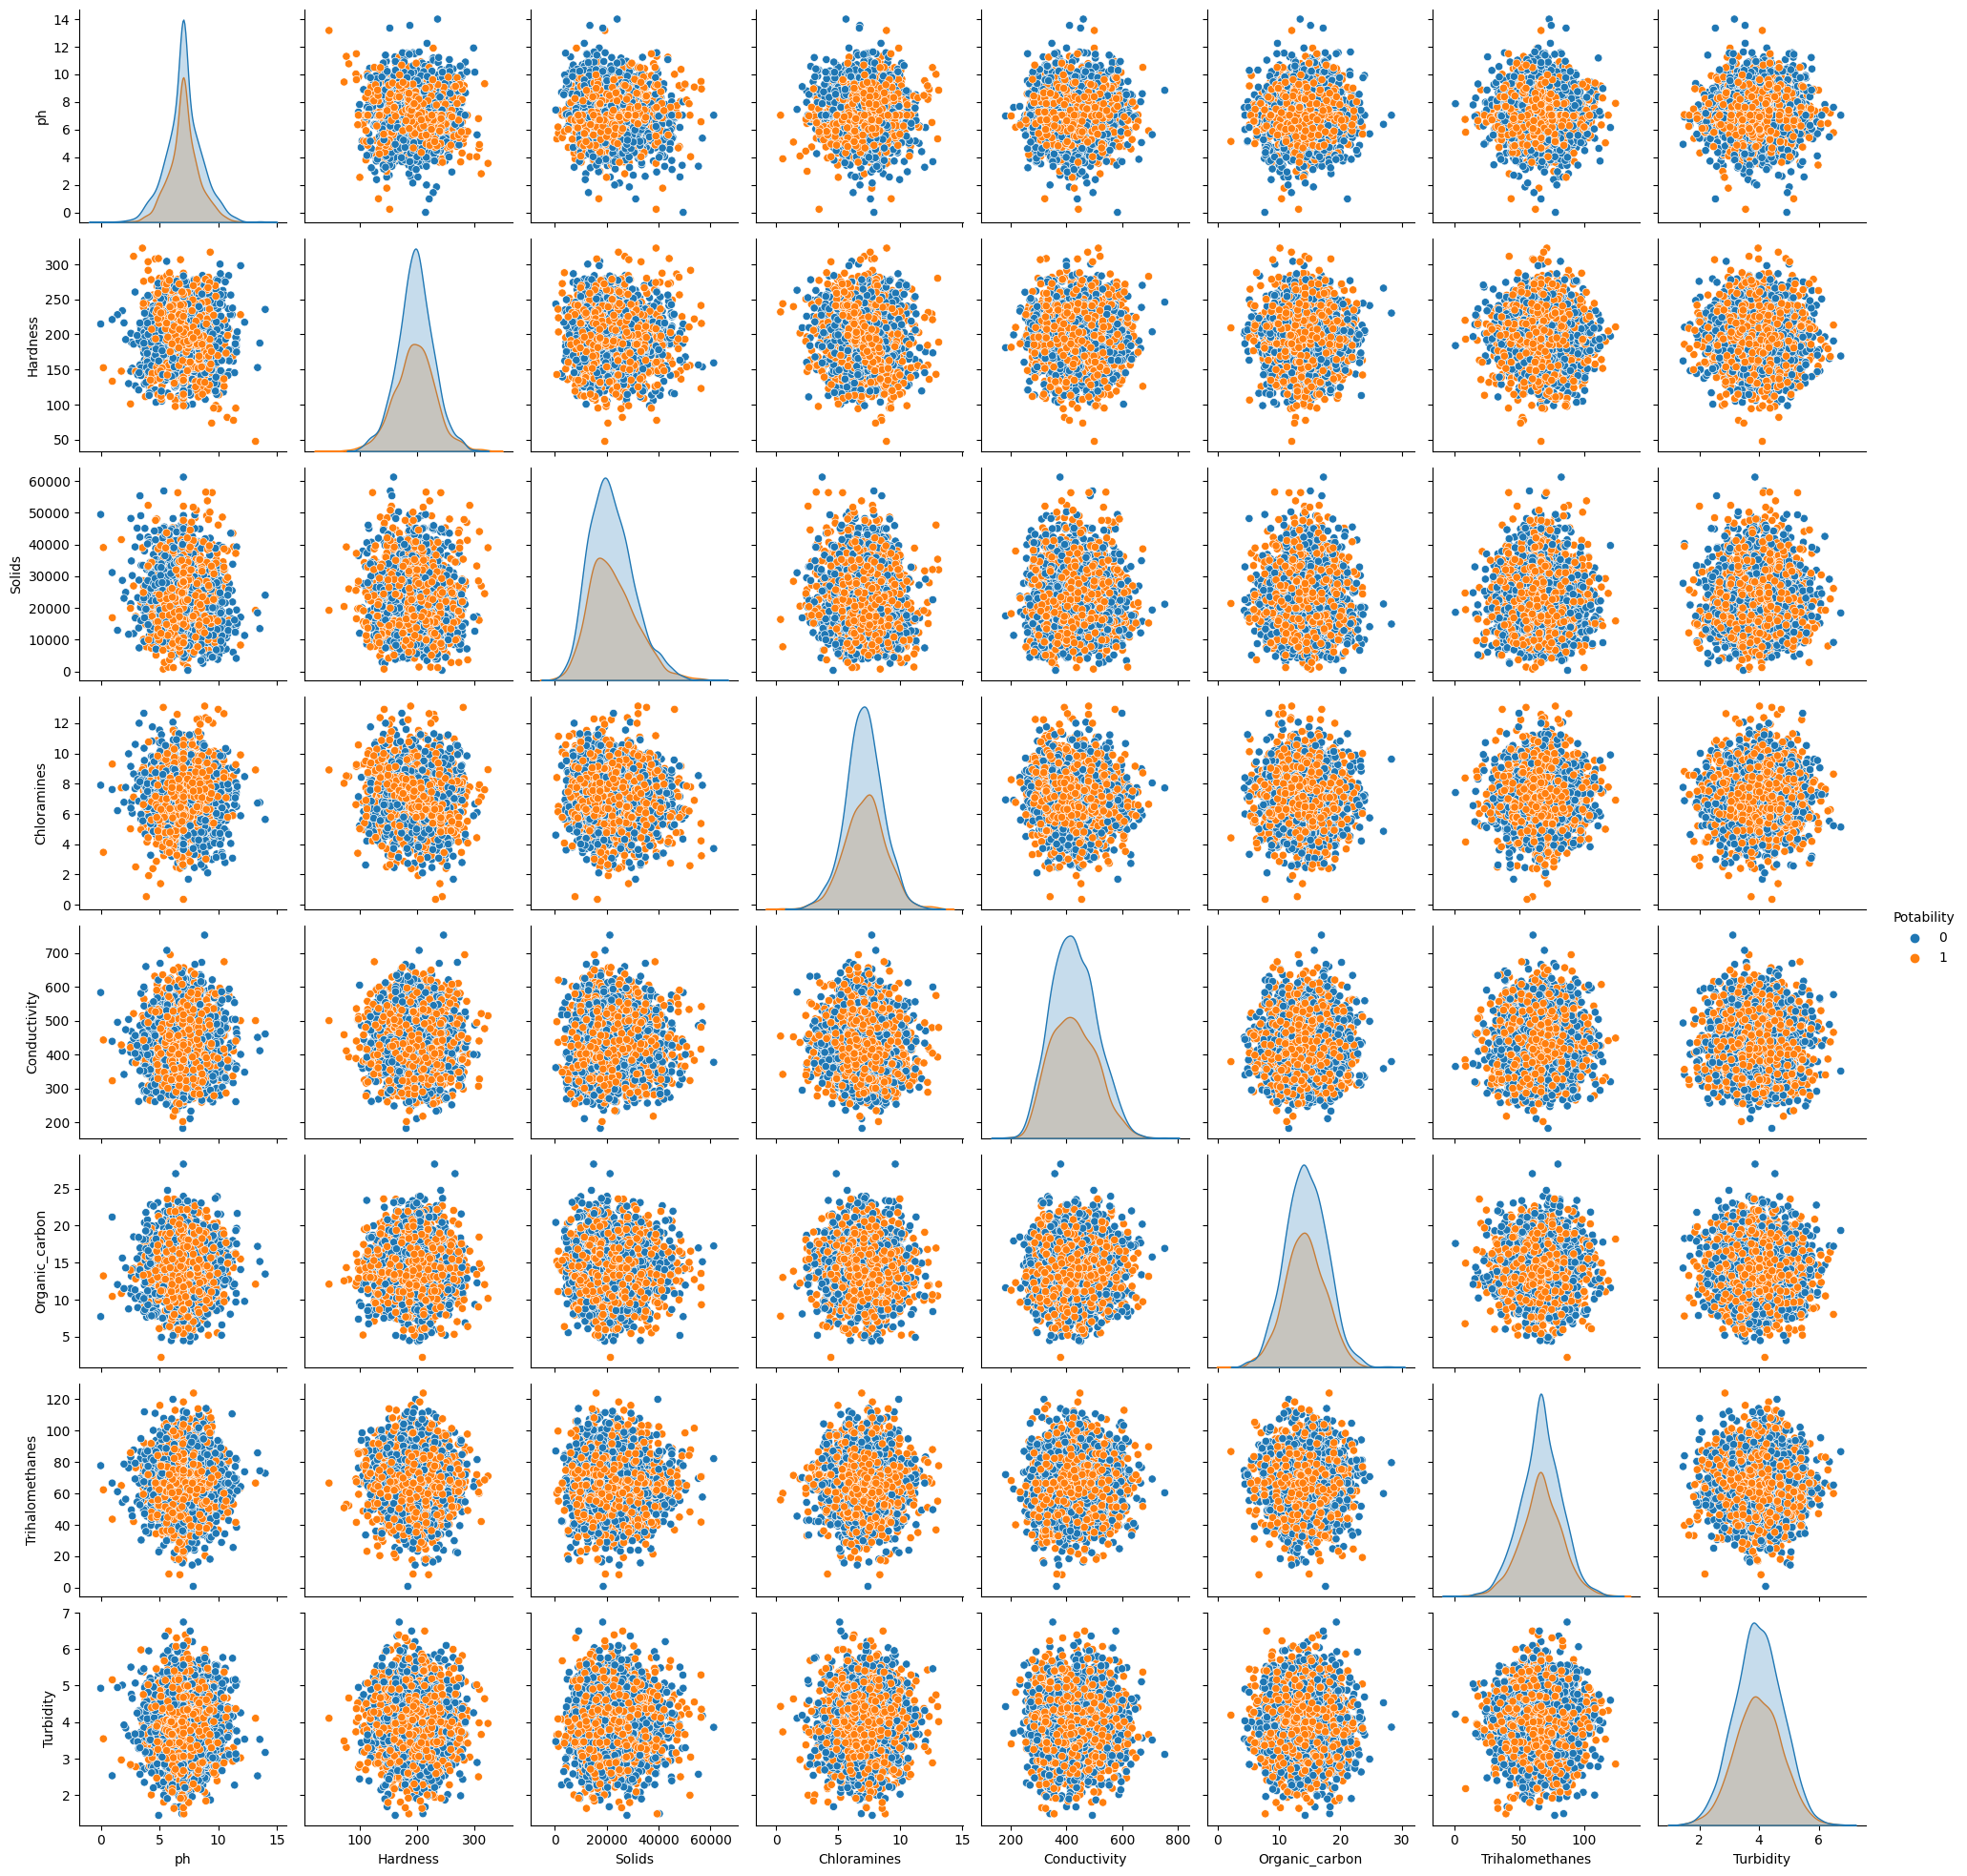

In [118]:
sns.pairplot(data, hue="Potability")

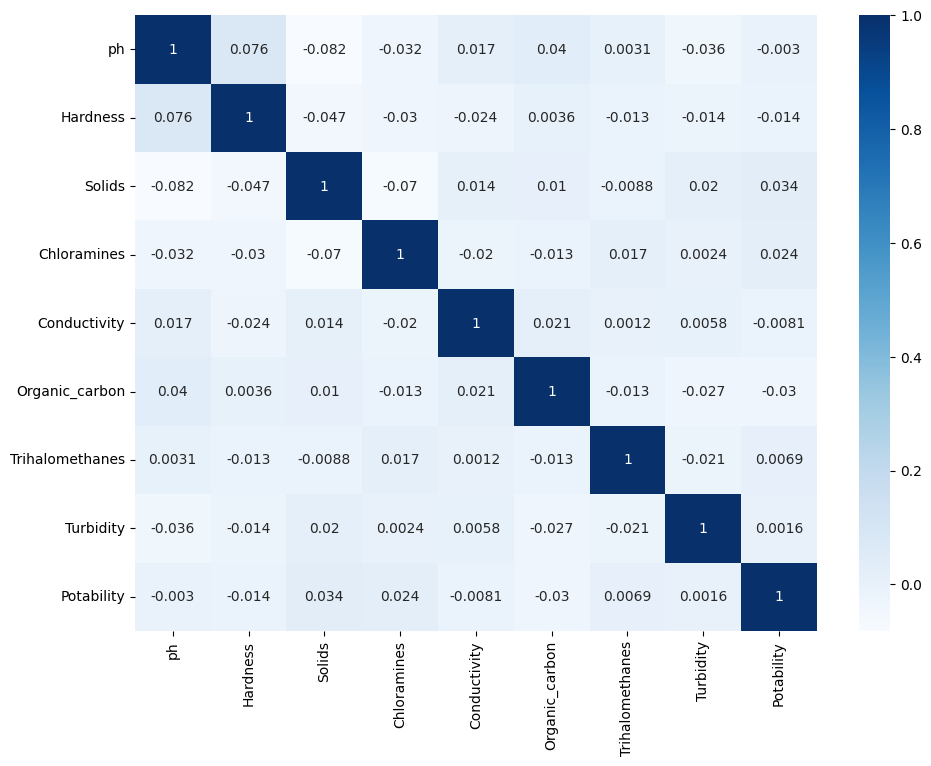

In [119]:
# Correlation matrix: 
plt.figure(figsize=(11,8))
sns.heatmap(data.corr(), annot=True,cmap='Blues')
plt.show()

* From heatmap I found  out their is no relationship between any features.Beacuse all values are negative or less than 1.

# 5.Data Preprocessing

In [120]:
x=data.drop('Potability',axis=1)
y=data["Potability"]

* Here my target variable is Potability.It is my dependent variable. Other are independent variables.

In [121]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-2.54735465e-02,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30543373e+00, -1.28629758e+00],
       [-2.28471739e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.39186284e-01,  6.84217891e-01],
       [ 6.97319183e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  8.00012586e-04, -1.16736546e+00],
       ...,
       [ 1.59565368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18037800e-01, -8.56006782e-01],
       [-1.32494885e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.02755628e-01,  9.50797383e-01],
       [ 5.44611034e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.79510303e-01, -2.12445866e+00]])

*  The varibles on x axis has very different values.So we  can't compare the varibles with each other.StandardScaler is used to standardize  the features into a standard format. 

# Feature Scaling

In [122]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Model Training

# 1.  Logistic Regression

In [123]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression
#create object for LogisticRegression

logregres=LogisticRegression()

#Training Model
logregres.fit(X_train,y_train)

LogisticRegression()

* Here  I used X_train is feature variable and y_train is target variable.

In [124]:
#Predicting the test set result 
y_pred=logregres.predict(X_test)

In [125]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

*  Here we predict the test set .

In [126]:
from sklearn.metrics import classification_report,accuracy_score
a=accuracy_score(y_test,y_pred)*100
a

62.80487804878049

*  Accuracy for logistic regression is 62%

In [127]:
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[412,   0],
       [244,   0]])

* Confusion matrix is table which is used to describe the classification lables also it is used for numeric values.

# 2.  Decision Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#creating the object for model
dt=DecisionTreeClassifier(criterion="gini",min_samples_split=10,splitter="best")

#train the decision tree by using .fit 
dt.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=10)

In [129]:
y_test

2947    0
2782    1
1644    0
70      0
2045    1
       ..
208     0
1578    1
565     0
313     1
601     0
Name: Potability, Length: 656, dtype: int64

In [130]:
y_pred=dt.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

* I predict the model using decision tree

In [131]:
print(f"Accuracy score={accuracy_score(y_test,y_pred)*100}")

Accuracy score=56.40243902439024


* Here the accuracy score for decision tree is 56%

In [132]:
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[272, 140],
       [146,  98]])

* Confusion matrix is table which is used to describe the classification lables also it is used for numeric values.

In [133]:
y_test.shape

(656,)

# 3. SVM(Support vector machine)

In [134]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report



# create object for model

support=SVC(kernel="rbf")

* Here I used the radial basis function kernel(rbf).
* I checked accuracy for other kernel also.But the accuracy was low for other kernel as compare to radial basis kernel.
* When the dataset is nonlinear that time we used the rbf kernel.that is reason i used the rbf kernel.

In [135]:
#train model

support.fit(X_train,y_train)

SVC()

In [136]:
y_test

2947    0
2782    1
1644    0
70      0
2045    1
       ..
208     0
1578    1
565     0
313     1
601     0
Name: Potability, Length: 656, dtype: int64

In [137]:
y_pred=support.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [138]:
accuracy_score_svm=accuracy_score(y_test,y_pred)
accuracy_score_svm

0.6417682926829268

*** The accuracy score for support vector machine is 64%.As compare with other models the accuracy score is much higher in support vector machine**

In [139]:
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[379,  33],
       [202,  42]])

In [140]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.56
Recall: 0.1721311475409836
F1-Score: 0.26332288401253917
